In [1]:
import numpy as np
import scipy.stats as st
import random
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
%precision 12
from __future__ import division


%matplotlib inline
plt.style.use('ggplot')

In [2]:
def P_mu(x_bar, mu, sigma):
    return 1/(2*np.pi*sigma**2)**(2.0)* np.exp(-( (mu - x_bar)**2)/(2*sigma**2))    

In [3]:
def Gamma(x, s, c):
    return 1/(sp.gamma(c)*s) * (x/s)**(c-1) * np.exp(-x/c)

In [4]:
sp.gamma(4)

6.000000000000

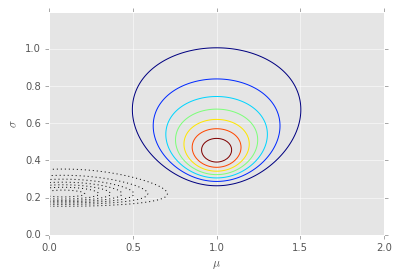

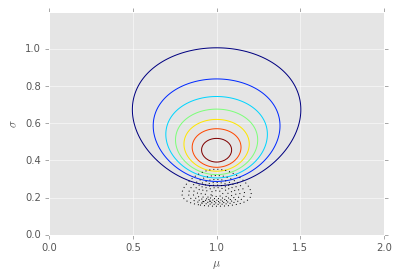

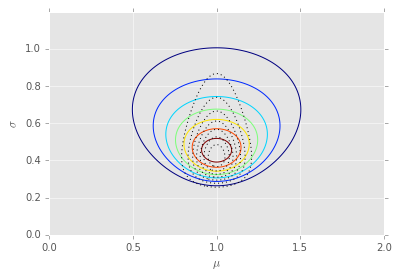

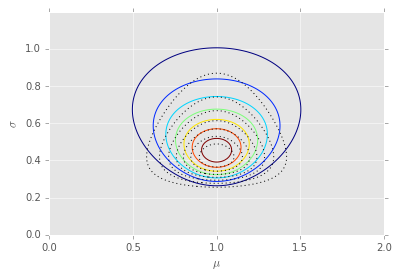

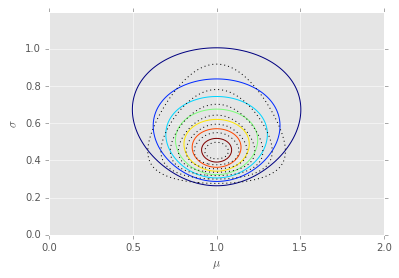

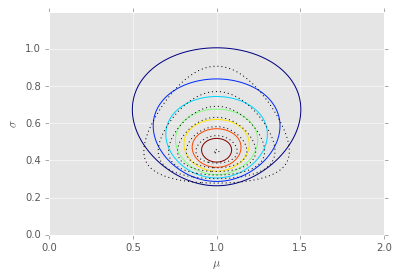

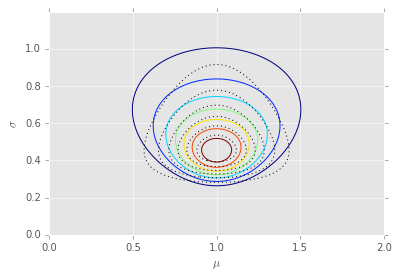

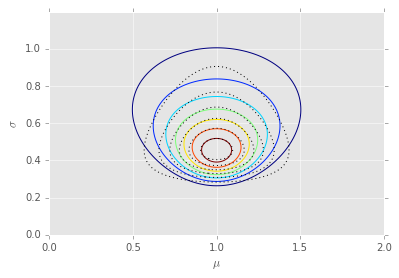

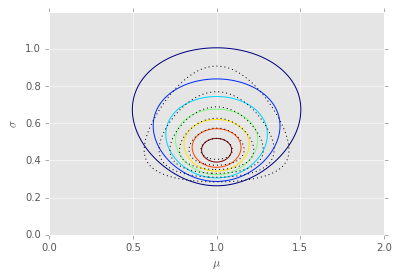

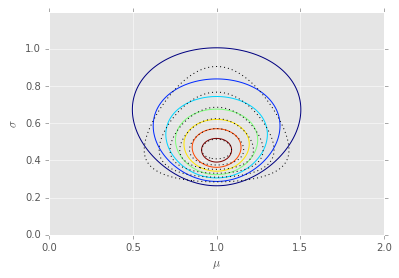

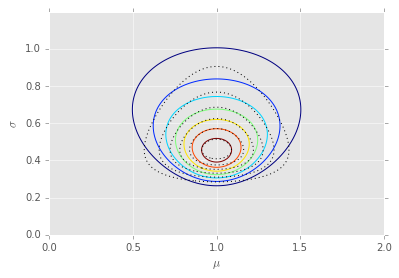

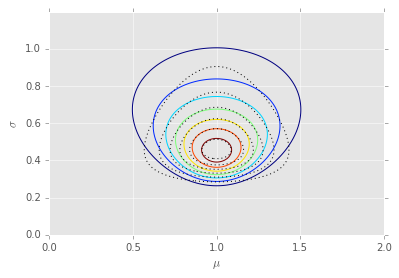

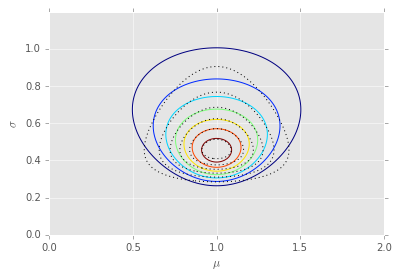

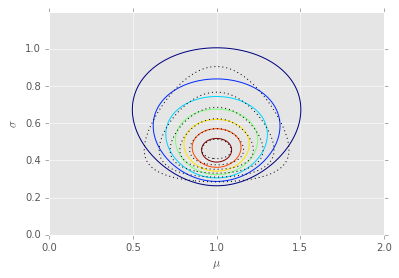

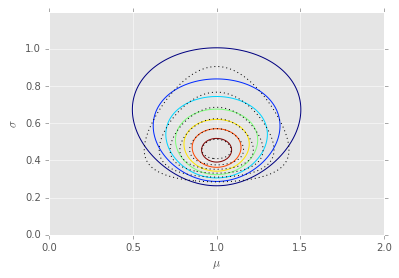

In [13]:
N = 5.0
S = 1.0

# random intial values
sigma_Q = 0.5*random.random()
b = 10* random.random()
c = 10* random.random()
x_bar = random.random()


# randodm initial Q 
def Qmu(X1):
    return P_mu(x_bar, X1, sigma_Q ) 
def Qsigma(X2):
    return 2.0/(X2**3.0)*1/(sp.gamma(c)*b) * (1.0/X2**2/b)**(c-1) * np.exp(-1.0/X2**2/b)

# will be integrated
def argument(X2):
    return Qsigma(X2) * 1/ X2**2

update = 0
while update < 15:
    
    plt.figure()
    x1 = np.arange(0.001, 3.0, 0.01)
    x2 = np.arange(0.001, 3.0, 0.01)
    X1, X2 = np.meshgrid(x1, x2)
    P = 1/(2*np.pi*X2**2)**(N/2.0)* np.exp(-( N*(X1 - 1.0)**2+S)/(2*X2**2))
    plt.contour(X1,X2,P)
    
    
    Q = Qmu(X1) * Qsigma(X2)
    plt.contour(X1,X2, Q ,linestyles = 'dotted',colors='k')
    plt.axis([0,2,0,1.2])
    plt.xlabel('$\mu$')
    plt.ylabel('$\sigma$')
    
    if update % 2 == 0:
        x_bar = 1.0
        beta_bar = integrate.quad( argument, 0.001,3.0)[0]
        sigma_Q = np.sqrt(1/(N*beta_bar))

    else:
        beta_bar = integrate.quad( argument, 0.001,3.0)[0]
        sigma_Q = np.sqrt(1/(N*beta_bar))
        b = 2.0/(N*sigma_Q**2 + S)
        c = N/2.0
        
    update += 1

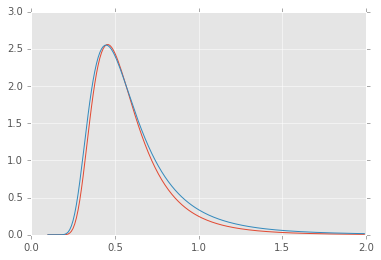

In [14]:
x = np.arange(0.1, 2.0, 0.01)
plt.plot(x,Qsigma(x))
1/(2*np.pi*X2**2)**(N/2.0)* np.exp(-( N*(X1 - 1.0)**2+S)/(2*X2**2))
plt.plot(x,55/(2*np.pi*x**2)**(N/2.0)* np.exp(-S/(2*x**2)))

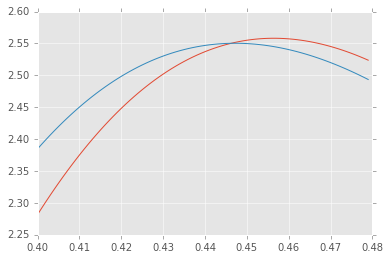

In [15]:
x = np.arange(0.4, 0.48, 0.001)
plt.plot(x,Qsigma(x))
plt.plot(x,55/(2*np.pi*x**2)**(N/2.0)* np.exp(-S/(2*x**2)))